# 1 Numerical or Categorical variable description: Distribution

Numerical variable description with a plot for one or several columns in a dataframe.

In [138]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## data

In [140]:
""" tips """

# load data
tips = sns.load_dataset("tips")
# get numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_num_tips = tips.select_dtypes(include=numerics).columns.tolist()


""" iris """

# load data

iris = sns.load_dataset("iris")
# get numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_num_iris = iris.select_dtypes(include=numerics).columns.tolist()

## plots 1 numerical

In [139]:
## plot distribution of a numerical column
def plot_1num(df:pd.DataFrame, column:str, ax:"matplotlib axis")->"matplotlib axis":
    """
    Plot distribution of a numerical column.
    df -- Input dataframes.
    column -- Column name to be plotted.
    ax -- Matplotlib axis.
    return -- Matplotlib axis resultant. 
    """
    # validation
    assert column in df.columns.tolist(), f"column '{column}' is not available."
    # plot
    ax = sns.stripplot(x = column, data = df, color = "red", alpha = .35, ax = ax)
    ax = sns.violinplot(x = column, data = df, scale="count", inner="quartile", scale_hue=False, bw=.2, ax = ax)
    ax = sns.boxplot(x = column, data = df, showfliers=True, showbox=False, ax = ax)
    # return axis
    return ax


## multiples plots for selected columns
def multiple_plots(df:pd.DataFrame, columns:"list or str", plot_function:"function", num_plots_per_row:int = 3):
    """
    Multiples plots for selected columns.
    df -- Input dataframes.
    columns -- Column names to be plotted.
    plot_function -- Function to be plotted for each columns.
    num_plots_per_row -- Number of plots per row (default, 3).
    """
    # if columns is only one string    
    if isinstance(columns, str):
        # figsize
        figsize = (10, 10)
        # number of plots in rows / columns
        nrs = ncs = 1
    # if is a list
    elif isinstance(columns, list):
        # number of columns to be ploted
        ncolumns = len(columns)
        # number of plots in rows / columns
        nrs = math.ceil(ncolumns / num_plots_per_row)
        ncs = num_plots_per_row if ncolumns >= num_plots_per_row else ncolumns 
        # figsize
        figsize = (ncs*5, nrs*5)    
    else:
        raise
    # create figure and axis    
    fig, ax = plt.subplots(ncols = ncs, nrows = nrs, figsize = figsize)
    # if axis is an array
    if isinstance(ax, np.ndarray):
        # reshape
        ax = ax.ravel()
        # loop of axis
        for ii, c in enumerate(columns):
            # plot in cells
            _ = plot_function(df, c, ax[ii])
    # if axis is only one
    else:
        # plots only one
        _ = plot_function(df, columns[0] if len(columns) == 1 else columns, ax)
    # display plot
    plt.show()
    
    
## multiple plots distribution of numerical columns
def plots_1num(df:pd.DataFrame, num_plots_per_row:int = 5)->pd.DataFrame:
    """
    Multiple plots distribution of numerical columns.
    df -- Input dataframes.
    num_plots_per_row -- Number of plots per row (default, 5).
    """    
    # collect numerical columns
    cols_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist() 
    # plot
    multiple_plots(df, cols_num, plot_1num, num_plots_per_row = num_plots_per_row)

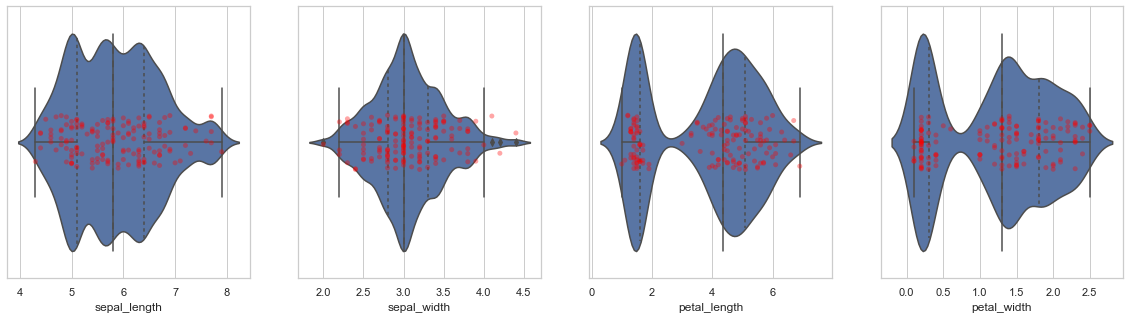

In [141]:
plots_1num(iris)

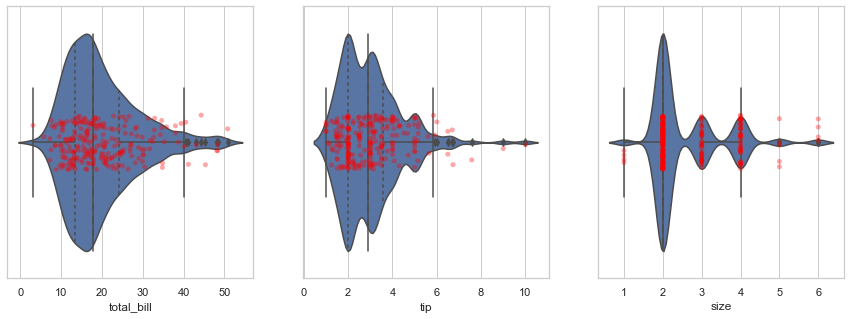

In [142]:
plots_1num(tips)

## plots 1 numerical

In [143]:
## multiple plots distribution of categorical columns
def plots_1cat(df:pd.DataFrame, num_plots_per_row:int = 3, max_num_uniq_values:int = 24)->pd.DataFrame:
    """
    Multiple plots distribution of categorical columns.
    df -- Input dataframes.
    num_plots_per_row -- Number of plots per row (default, 5).
    max_num_uniq_values -- Selected limit of possible number of values (default, 24).
    """    
    # collect numerical columns
    cols_cat = df.select_dtypes(include=['object', 'category', 'bool', 'int']).columns.tolist() 
    # remove categorical columns with too much possible values
    cols_cat = [c for c in cols_cat if len(df[c].unique()) <= max_num_uniq_values]
    # plot
    if len(cols_cat) > 0:
        multiple_plots(df, cols_cat, plot_1cat, num_plots_per_row = num_plots_per_row)
    else:
        raise Exception(f"There are not any column with less or equal possible values than {max_num_uniq_values}.")
    

## plot distribution of a categorical column
def plot_1cat(df:pd.DataFrame, column:str, ax:"matplotlib axis")->"matplotlib axis":
    """
    Plot distribution of a categorical column.
    df -- Input dataframes.
    column -- Column name to be plotted.
    ax -- Matplotlib axis.
    return -- Matplotlib axis resultant. 
    """
    # validation
    assert column in df.columns.tolist(), f"column '{column}' is not available."
    # plot
    ax = sns.countplot(x=column, data=df, ax = ax)
    # return axis
    return ax

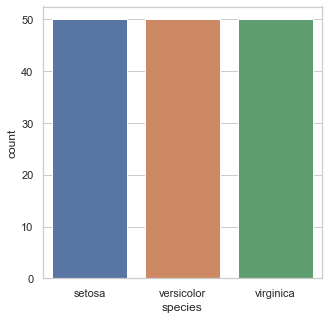

In [145]:
plots_1cat(iris)

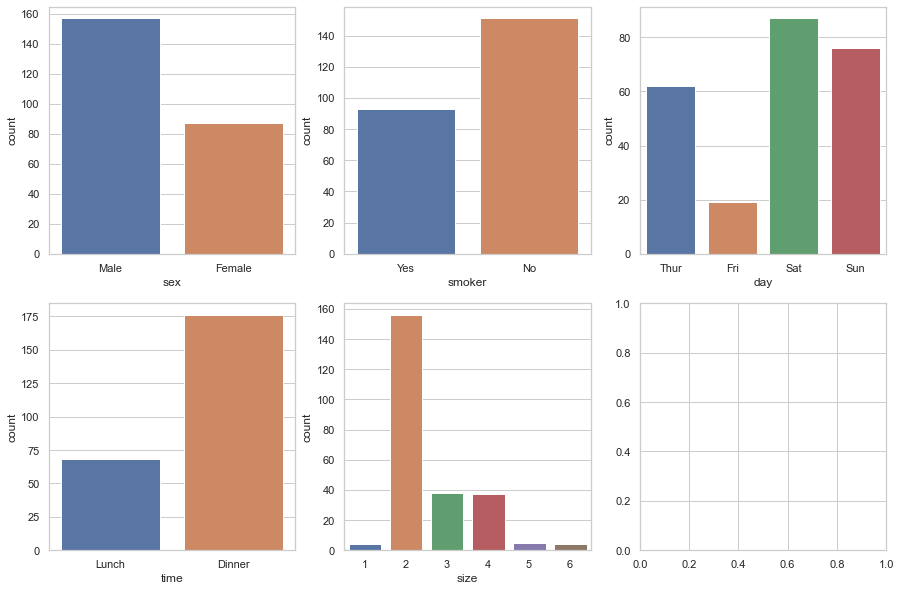

In [146]:
plots_1cat(tips)